In [27]:
! pip install openpyxl
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import classification_report  # Import classification_report
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\wrksy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
# Load data
data = pd.read_excel('dataset.xlsx')
data.head()


,S/N,CASE TITLE,SUIT NO,CITATION,STORY,ISSUES
0,NaN,UKPABI v. UKPABI & ORS,CA/OW/571/2018,(2019) LPELR-48481(CA),INTRODUCTION: \n \n This appeal borders on civ...,Effect of a ground of appeal from which no iss...
1,NaN,EKWUGHA v. STATE,CA/OW/576C/2018,(2020) LPELR-50629(CA),INTRODUCTION: \n \n This appeal borders on the...,Position of the law on a no case submission\n ...
2,NaN,ROCHE CONSTRUCTION (NIG) LTD & ANOR v. ENYIDEDE,CA/OW/58/2015,(2017) LPELR-42438(CA),INTRODUCTION: \n \n &nbsp;This appeal borders ...,Whether a party is allowed to formulate more i...
3,NaN,CHARLES v. COP ABIA STATE,CA/OW/58/2020,(2021) LPELR-56547(CA),INTRODUCTION: \n \n This appeal borders on enf...,Position of the law on remanding an accused pe...
4,NaN,UKAEGBU v. OGBUISI & ANOR,CA/OW/58M/2019(R),(2020) LPELR-49719(CA),INTRODUCTION: \n \n This is a ruling on an app...,Effect of failure to make reference to and/or ...


In [29]:
# Get the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


# Get the column names
print("Column names:", data.columns.tolist())

# Get the data types of each column
print(data.dtypes)

# Get basic statistics for numerical columns
print(data.describe())

# Get basic statistics for categorical columns
print(data.describe(include=['object']))

Dataset contains 500 rows and 6 columns.
Column names: ['S/N', 'CASE TITLE', 'SUIT NO', 'CITATION', 'STORY', 'ISSUES']
S/N           float64
CASE TITLE     object
SUIT NO        object
CITATION       object
STORY          object
ISSUES         object
dtype: object
       S/N
count  0.0
mean   NaN
std    NaN
min    NaN
25%    NaN
50%    NaN
75%    NaN
max    NaN
             CASE TITLE         SUIT NO                CITATION  \
count               500             500                     500   
unique              480             500                     500   
top     NDUKWU v. STATE  CA/OW/571/2018  (2019) LPELR-48481(CA)   
freq                  4               1                       1   

                                                    STORY  \
count                                                 499   
unique                                                499   
top     INTRODUCTION: \n \n This appeal borders on civ...   
freq                                                    

In [30]:
# Check for missing values
print(data.isna().sum())

S/N           500
CASE TITLE      0
SUIT NO         0
CITATION        0
STORY           1
ISSUES          0
dtype: int64


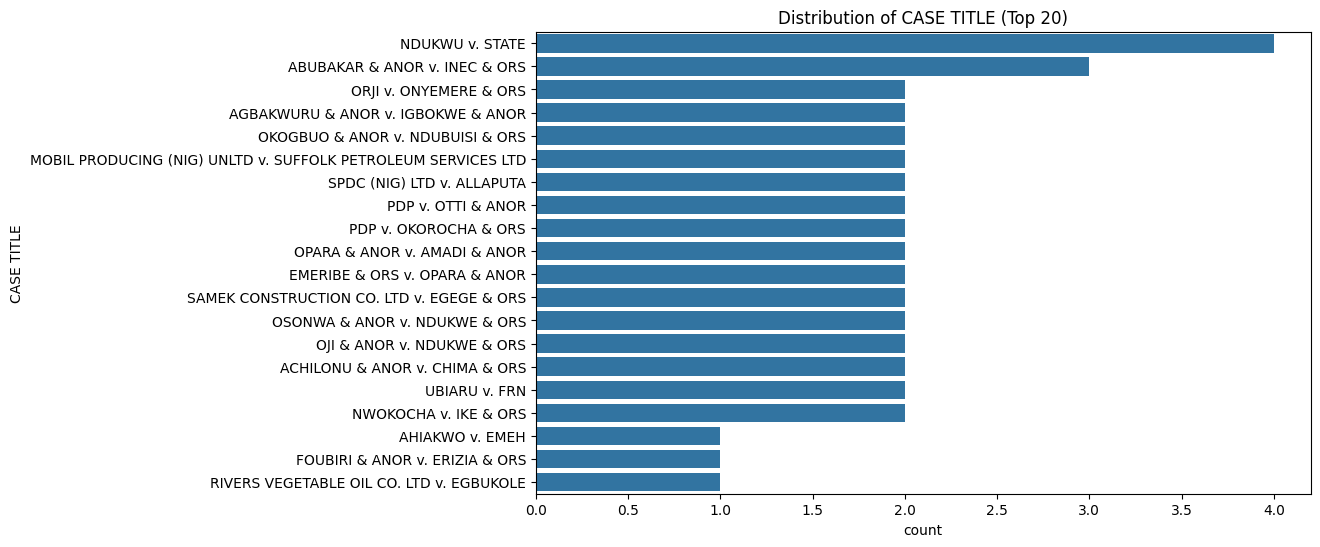

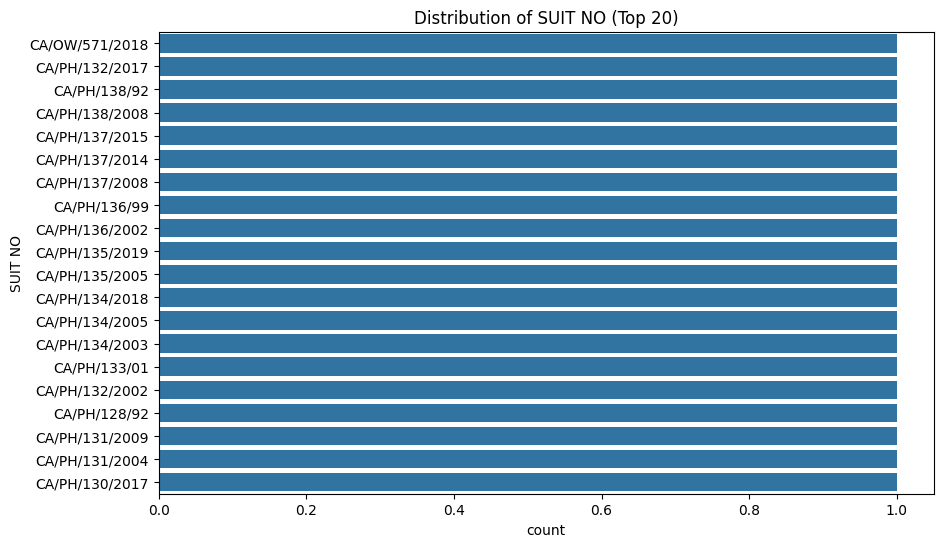

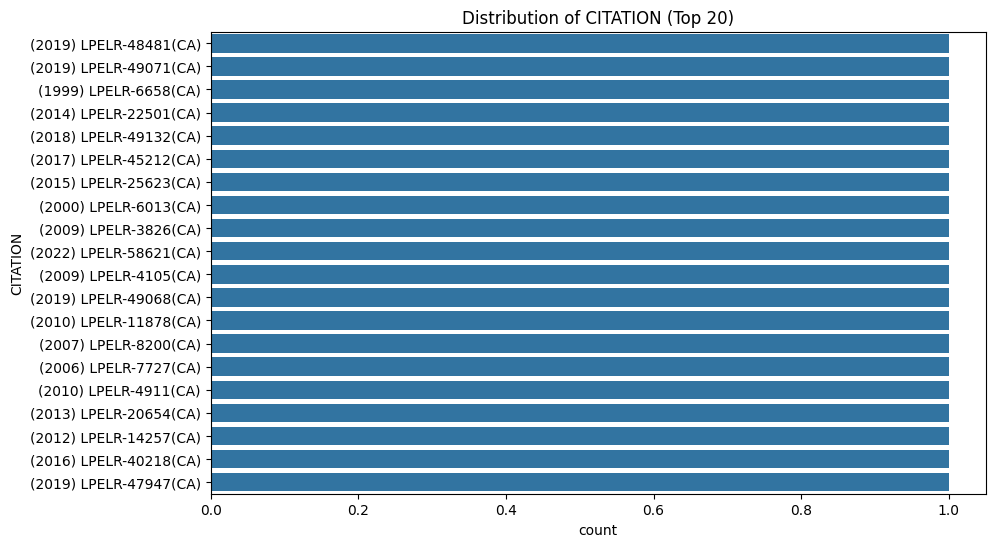

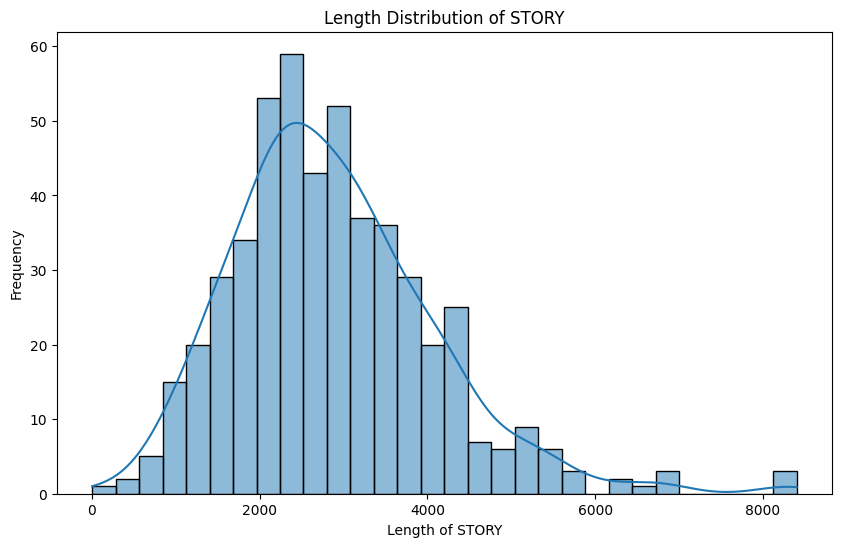

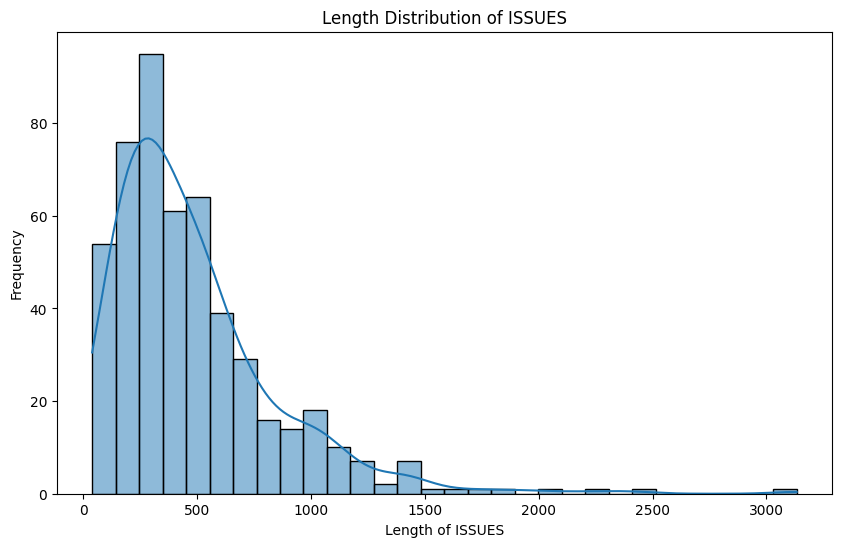

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert all entries in STORY and ISSUES columns to strings
data['STORY'] = data['STORY'].astype(str)
data['ISSUES'] = data['ISSUES'].astype(str)

# Plot the distribution of CASE TITLE (displaying only top 20 for better visualization)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['CASE TITLE'], order=data['CASE TITLE'].value_counts().iloc[:20].index)
plt.title('Distribution of CASE TITLE (Top 20)')
plt.show()

# Plot the distribution of SUIT NO (displaying only top 20 for better visualization)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['SUIT NO'], order=data['SUIT NO'].value_counts().iloc[:20].index)
plt.title('Distribution of SUIT NO (Top 20)')
plt.show()

# Plot the distribution of CITATION (displaying only top 20 for better visualization)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['CITATION'], order=data['CITATION'].value_counts().iloc[:20].index)
plt.title('Distribution of CITATION (Top 20)')
plt.show()

# Plot the length distribution of STORY
data['STORY_LENGTH'] = data['STORY'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['STORY_LENGTH'], bins=30, kde=True)
plt.title('Length Distribution of STORY')
plt.xlabel('Length of STORY')
plt.ylabel('Frequency')
plt.show()

# Plot the length distribution of ISSUES
data['ISSUES_LENGTH'] = data['ISSUES'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['ISSUES_LENGTH'], bins=30, kde=True)
plt.title('Length Distribution of ISSUES')
plt.xlabel('Length of ISSUES')
plt.ylabel('Frequency')
plt.show()

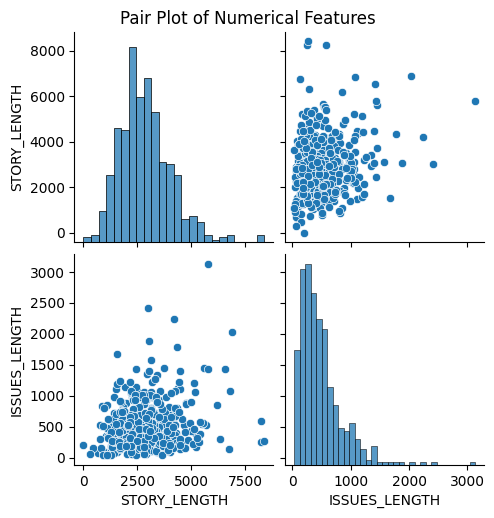

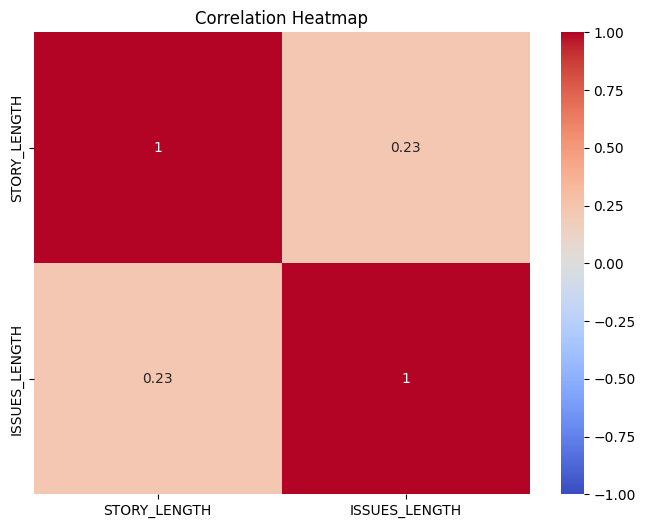

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure STORY and ISSUES are treated as strings and calculate their lengths
data['STORY'] = data['STORY'].astype(str)
data['ISSUES'] = data['ISSUES'].astype(str)
data['STORY_LENGTH'] = data['STORY'].apply(len)
data['ISSUES_LENGTH'] = data['ISSUES'].apply(len)

# Create a pair plot for numerical features
sns.pairplot(data[['STORY_LENGTH', 'ISSUES_LENGTH']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Calculate the correlation matrix
correlation_matrix = data[['STORY_LENGTH', 'ISSUES_LENGTH']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# Feature Engineering: Extracting Features from CASE TITLE
case_split = data['CASE TITLE'].str.split(' v. ', expand=True)
case_split.columns = ['PLAINTIFF', 'DEFENDANT']
data = pd.concat([data, case_split], axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wrksy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


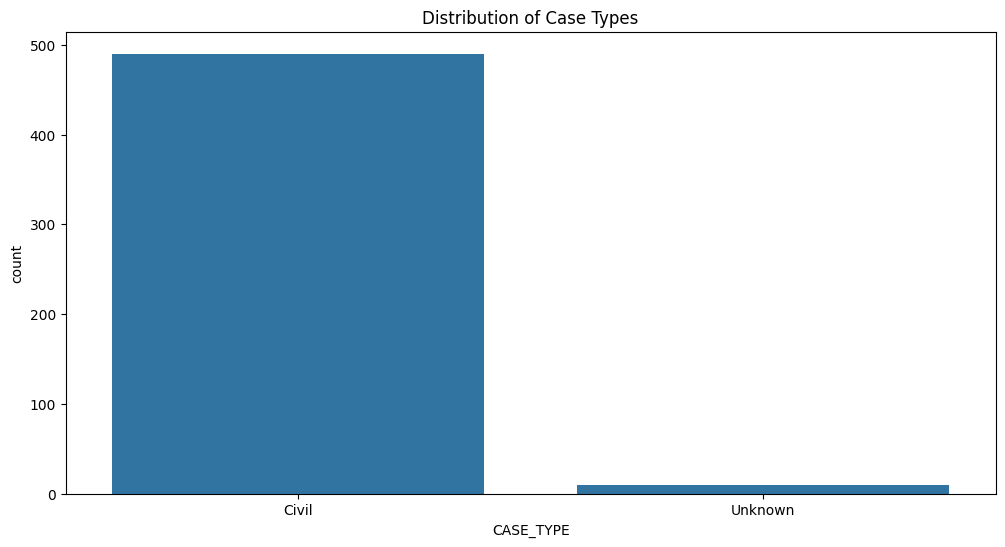

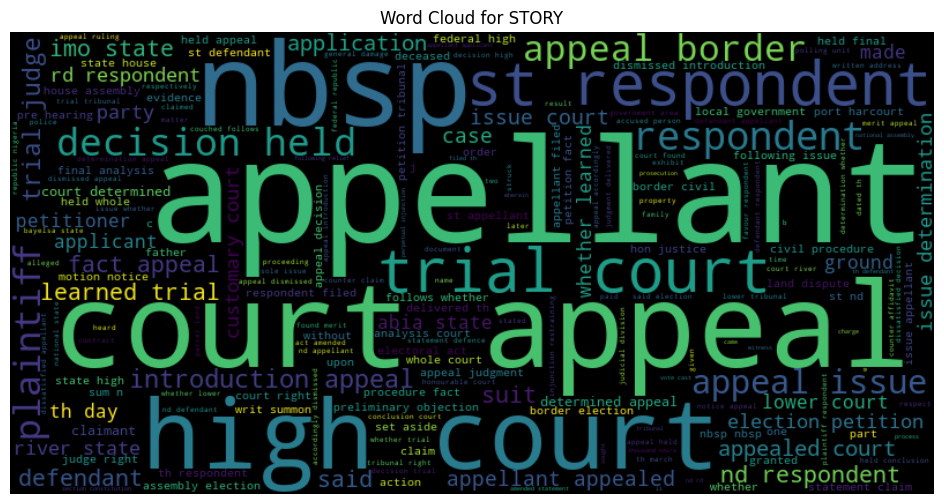

In [34]:
# Handling cases without ' v. ' by filling NA values appropriately
data['PLAINTIFF'].fillna('Unknown', inplace=True)
data['DEFENDANT'].fillna('Unknown', inplace=True)

data['CASE_TYPE'] = data['CASE TITLE'].apply(lambda x: 'Civil' if ' v. ' in x else 'Unknown')

# Handling NaN values in text columns before vectorization
data['STORY'].fillna('', inplace=True)
data['ISSUES'].fillna('', inplace=True)

# Text Preprocessing: Clean and tokenize the text
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    words = nltk.word_tokenize(text)  # Tokenize text into words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

data['Cleaned_STORY'] = data['STORY'].apply(preprocess_text)
data['Cleaned_ISSUES'] = data['ISSUES'].apply(preprocess_text)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.countplot(x='CASE_TYPE', data=data)
plt.title('Distribution of Case Types')
plt.show()

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['Cleaned_STORY']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for STORY')
plt.show()

In [35]:
# Textual Features: TF-IDF Vectors
tfidf_vectorizer_story = TfidfVectorizer(max_features=5000)
tfidf_story = tfidf_vectorizer_story.fit_transform(data['Cleaned_STORY']).toarray()

tfidf_vectorizer_issues = TfidfVectorizer(max_features=5000)
tfidf_issues = tfidf_vectorizer_issues.fit_transform(data['Cleaned_ISSUES']).toarray()


In [36]:
from sklearn.preprocessing import LabelEncoder
		
y = ['CASE TITLE', 'SUIT NO', 'CITATION', 'STORY', 'ISSUES']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(y_encoded)


[0 4 1 3 2]


In [37]:
y = data['SUIT NO']

# Encode the target variable 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(y_encoded)

# Combine rare classes
y_combined = y.copy()

# Identify classes with very few instances
counts = y_combined.value_counts()
rare_classes = counts[counts < 2].index

y_combined[y_combined.isin(rare_classes)] = 'Rare'

# Perform train-test split
X = data[['CASE TITLE', 'STORY']]  # Select features (X)
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Encode the target variable if necessary
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [38]:
from sklearn.model_selection import train_test_split

# Assuming X_mod and y_mod are already defined
# X_mod should contain your features and y_mod your target variable

# Perform train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print("Shapes after train-test split:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Shapes after train-test split:
X_train shape: (400, 2)
y_train shape: (400,)
X_test shape: (100, 2)
y_test shape: (100,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Ensure STORY and ISSUES are treated as strings and calculate their lengths
data['STORY'] = data['STORY'].astype(str)
data['ISSUES'] = data['ISSUES'].astype(str)
data['combined_text'] = data['CASE TITLE'] + ' ' + data['STORY'] + ' ' + data['ISSUES']

# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['combined_text']).toarray()

# Create dummy labels for demonstration (replace with actual labels if available)
np.random.seed(42)
y = np.random.randint(0, 2, size=data.shape[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision,recall,f1

(0.53, 0.5, 0.8723404255319149, 0.6356589147286822)

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision,recall,f1

(0.55, 0.515625, 0.7021276595744681, 0.5945945945945946)

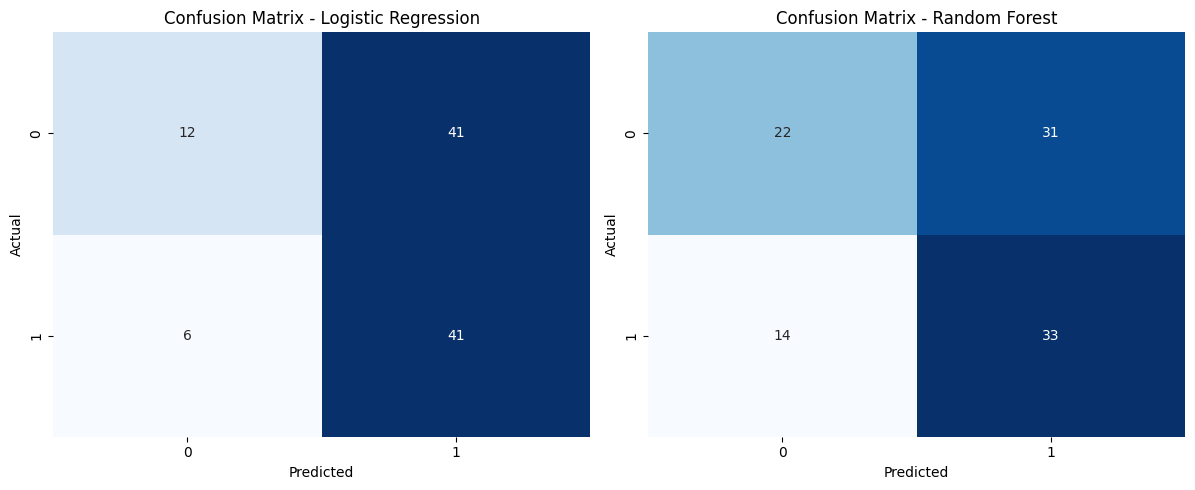

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load and preprocess data
data['STORY'] = data['STORY'].astype(str)
data['ISSUES'] = data['ISSUES'].astype(str)
data['combined_text'] = data['CASE TITLE'] + ' ' + data['STORY'] + ' ' + data['ISSUES']

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['combined_text']).toarray()

np.random.seed(42)
y = np.random.randint(0, 2, size=data.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrices
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.tight_layout()
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess data
data['STORY'] = data['STORY'].astype(str)
data['ISSUES'] = data['ISSUES'].astype(str)
data['combined_text'] = data['CASE TITLE'] + ' ' + data['STORY'] + ' ' + data['ISSUES']

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['combined_text']).toarray()

# Create dummy labels for demonstration (replace with actual labels if available)
np.random.seed(42)
y = np.random.randint(0, 2, size=data.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Create a DataFrame to compare the metrics
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_log_reg, accuracy_rf],
    'Precision': [precision_log_reg, precision_rf],
    'Recall': [recall_log_reg, recall_rf],
    'F1 Score': [f1_log_reg, f1_rf]
})

# Display the comparison DataFrame
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression      0.53   0.500000  0.872340  0.635659
1        Random Forest      0.55   0.515625  0.702128  0.594595
